In [333]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [334]:
data = pd.read_csv('../input/kc_house_data.csv')

In [335]:
plt.rcParams["figure.figsize"] = (15,5)

In [336]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [337]:
data.columns[data.isnull().any()]

Index([], dtype='object')

There is no invalid values

In [338]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**EDA**

**1.Finding unique values for each feature**

In [339]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [340]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [341]:
data['sqft_living'].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [342]:
data['sqft_lot'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076])

In [343]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [344]:
data['waterfront'].unique()

array([0, 1])

In [345]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [346]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

In [347]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [348]:
data['sqft_above'].unique()

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18

In [349]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [350]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [351]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [352]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [353]:
data['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [354]:
data['long'].unique()

array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.

In [355]:
data['sqft_living15'].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

In [356]:
data['sqft_lot15'].unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007])

In [357]:
numeric_columns = ['id','date','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','lat','long','sqft_living15','sqft_lot15','yr_built','yr_renovated','zipcode','price']
categorical_columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition','grade']

From the above analysis it seems the data contains valid values

 **2.Univariate Analysis of features**

In [358]:
categorical_columns

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

1.97429953543601

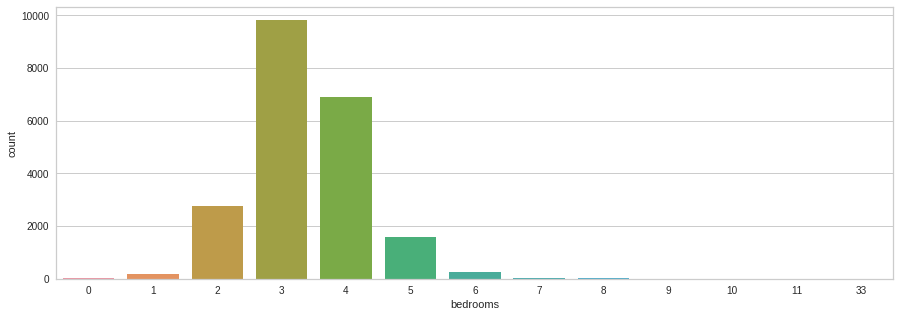

In [359]:
sns.countplot(data['bedrooms'])
data['bedrooms'].skew()

0.5111075733474171

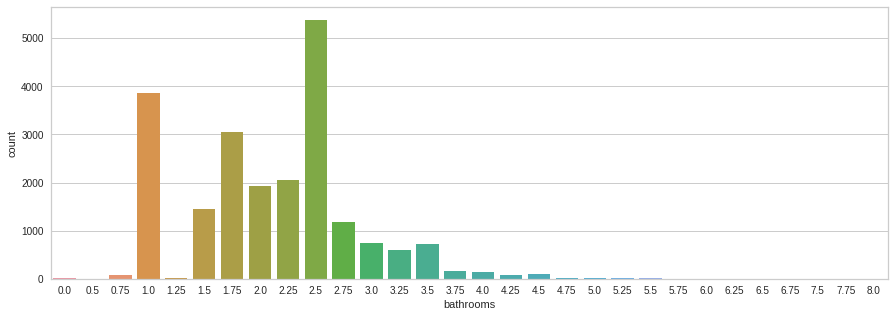

In [360]:
sns.countplot(data['bathrooms'])
data['bathrooms'].skew()

0.616176721157611

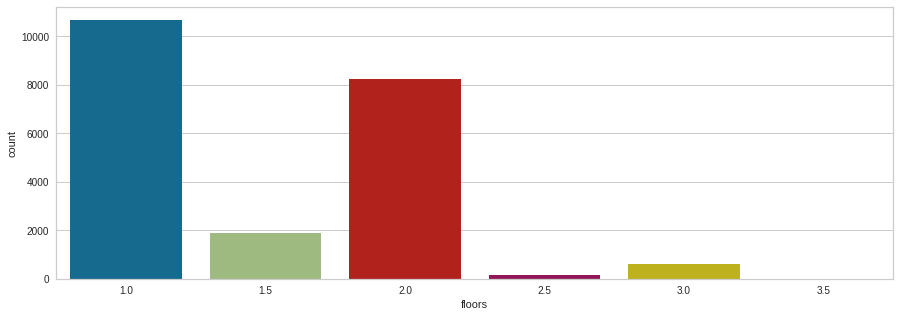

In [361]:
sns.countplot(data['floors'])
data['floors'].skew()

11.385107942339081

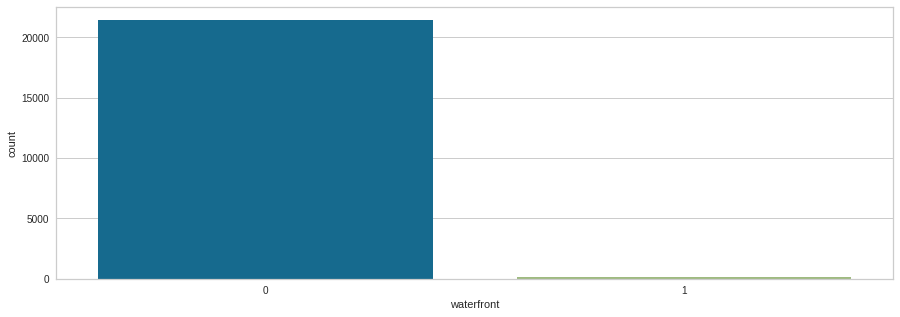

In [362]:
sns.countplot(data['waterfront'])
data['waterfront'].skew()

3.395749593248714

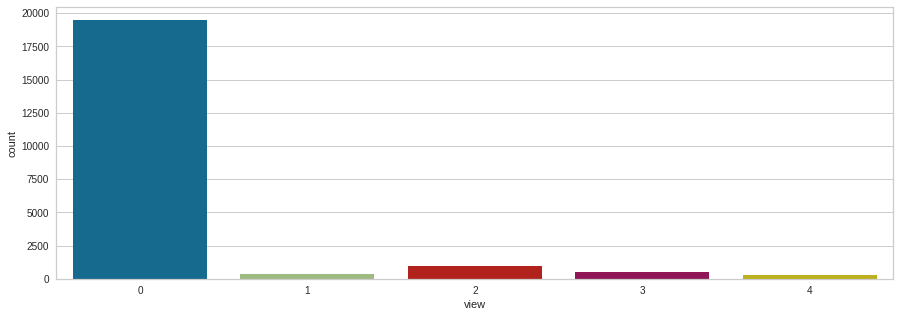

In [363]:
sns.countplot(data['view'])
data['view'].skew()

1.0328046374434587

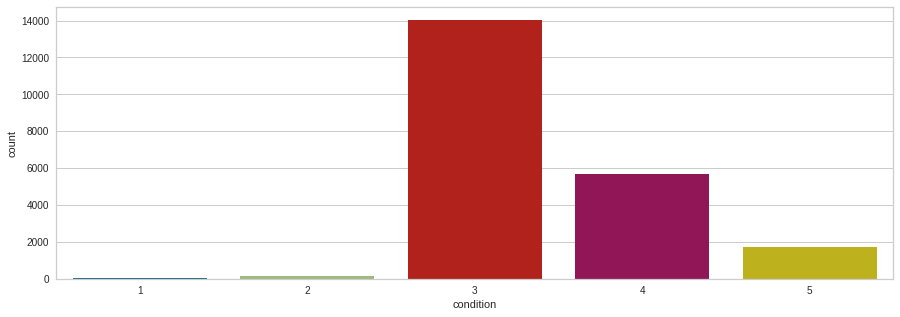

In [364]:
sns.countplot(data['condition'])
data['condition'].skew()

Condition 3 houses are more

0.7711032007576067

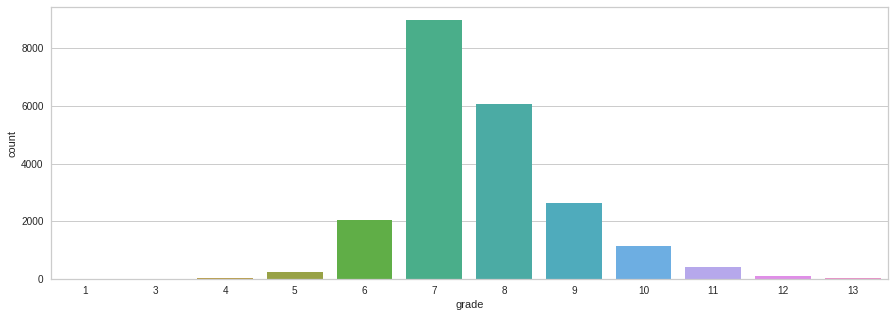

In [365]:
sns.countplot(data['grade'])
data['grade'].skew()

In [366]:
numeric_columns

['id',
 'date',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'price']

4.024069144684712

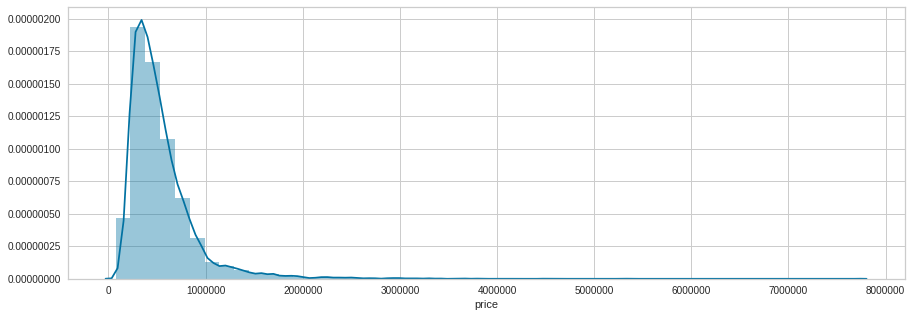

In [367]:
sns.distplot(data['price'])
data['price'].skew()

price-high positive skew

1.471555426802092

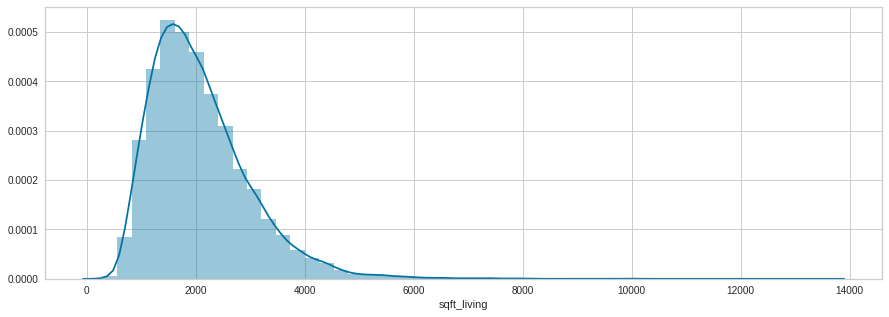

In [368]:
sns.distplot(data['sqft_living'])
data['sqft_living'].skew()

sqft living-positive skew

13.060018959031755

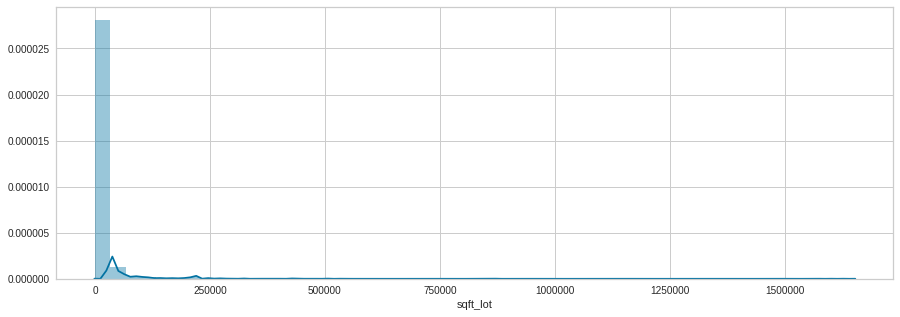

In [369]:
sns.distplot(data['sqft_lot'])
data['sqft_lot'].skew()

sqft lot-very high skew

1.4466644733818372

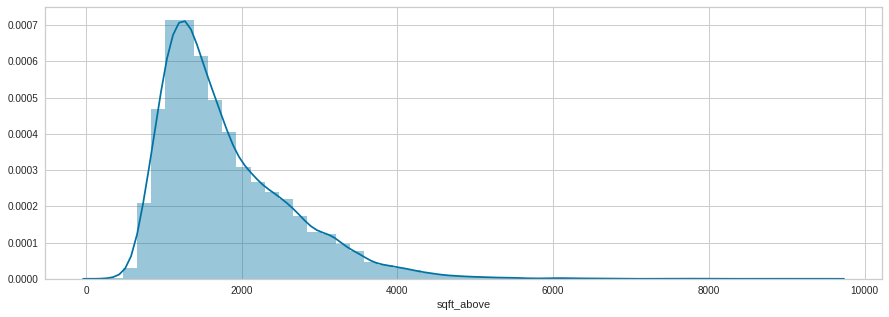

In [370]:
sns.distplot(data['sqft_above'])
data['sqft_above'].skew()

sqft above-positive skew

1.5779650555996247

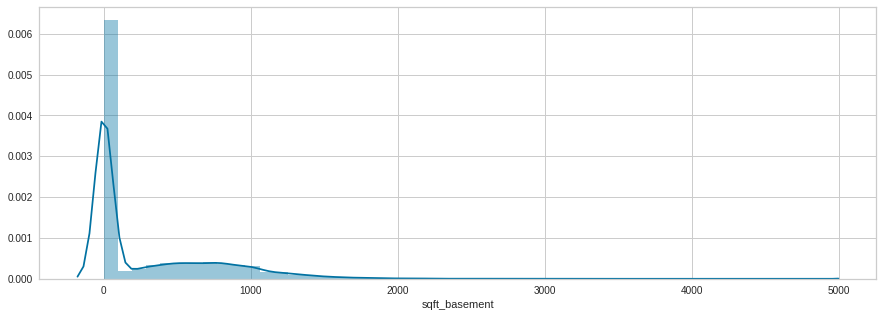

In [371]:
sns.distplot(data['sqft_basement'])
data['sqft_basement'].skew()

sqft_basement- positive skew

-0.46980539881436767

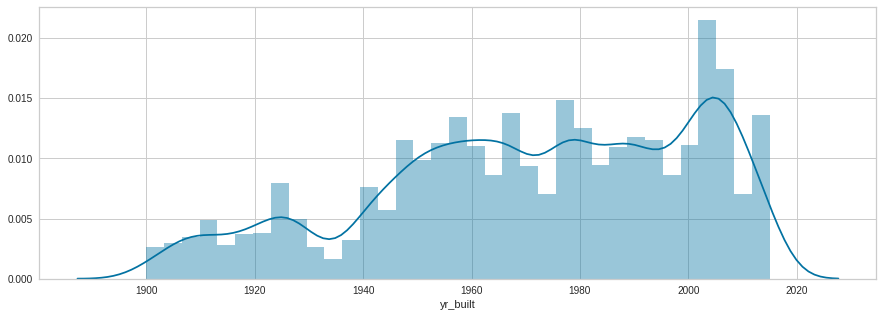

In [372]:
sns.distplot(data['yr_built'])
data['yr_built'].skew()

4.549493366993928

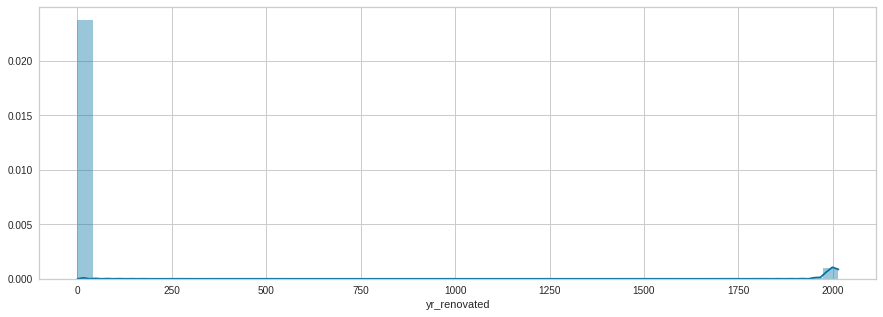

In [373]:
sns.distplot(data['yr_renovated'])
data['yr_renovated'].skew()

High Skewness

0.4056612082396646

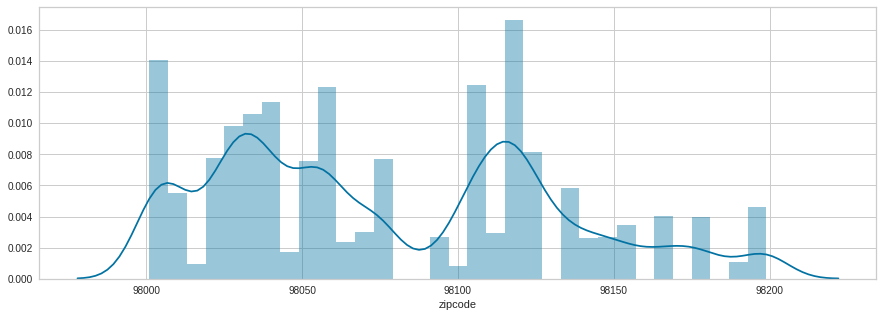

In [374]:
sns.distplot(data['zipcode'])
data['zipcode'].skew()

-0.4852704765380861

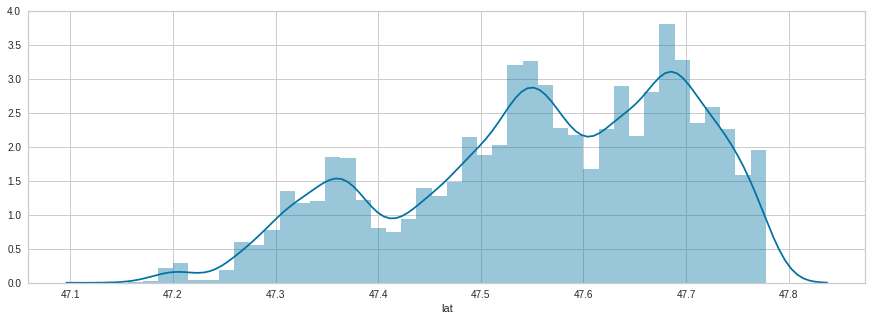

In [375]:
sns.distplot(data['lat'])
data['lat'].skew()

More houses are located between lat 47.5-47.8

0.8850529834328087

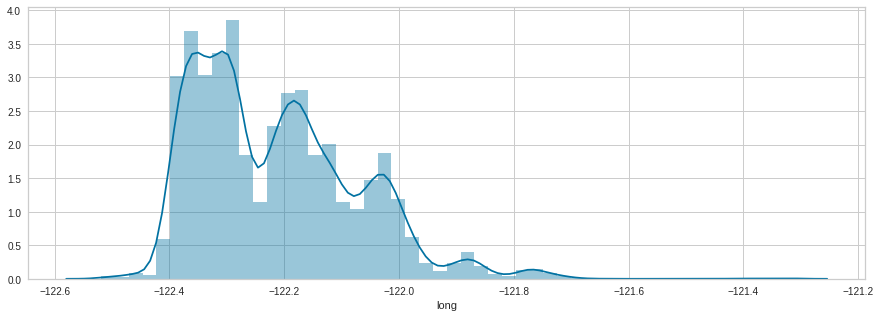

In [376]:
sns.distplot(data['long'])
data['long'].skew()

more houses are located btw -122.4 to -122.0

1.1081812758966967

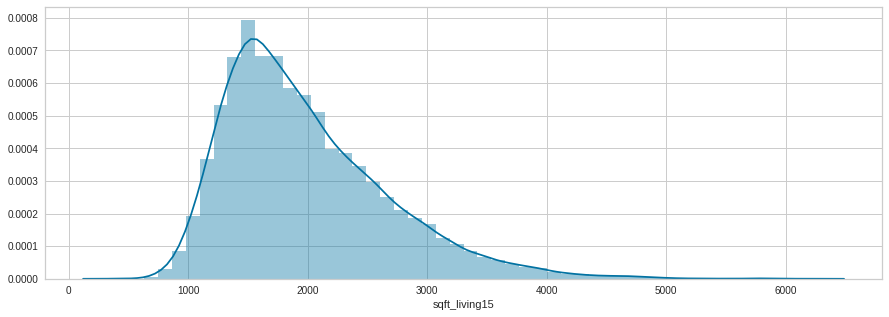

In [377]:
sns.distplot(data['sqft_living15'])
data['sqft_living15'].skew()

most houses with 2000 sqft

9.506743246764398

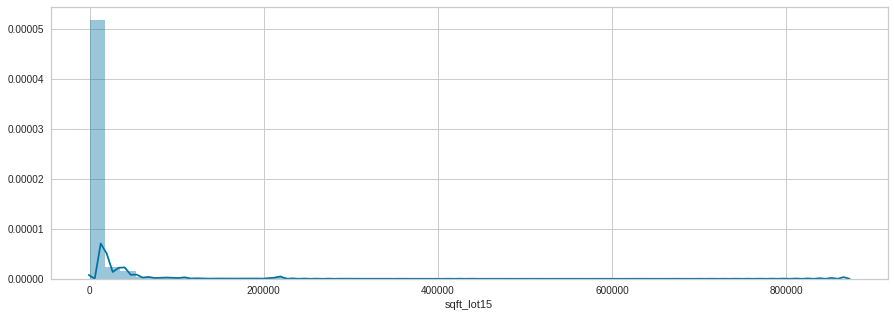

In [378]:
sns.distplot(data['sqft_lot15'])
data['sqft_lot15'].skew()

High skewness

From the above analysis it is found that many features have High skewness. So it has to be normalised

**3.Bivariate Analysis(target vs features)
target=Price**

1.categorical 

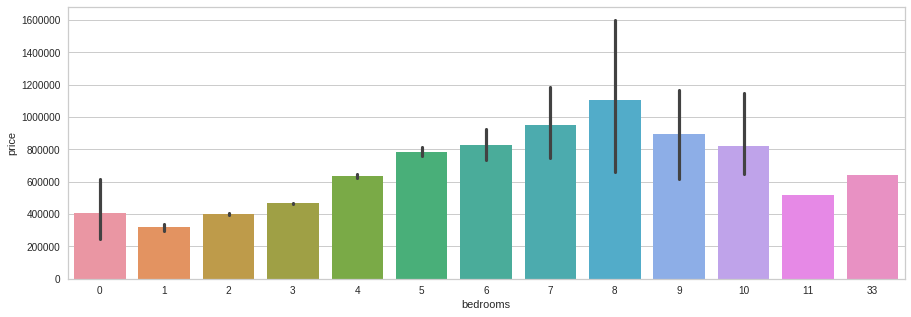

In [379]:
sns.barplot(x='bedrooms', y='price', data=data)

houses with 8 bedrooms has high price

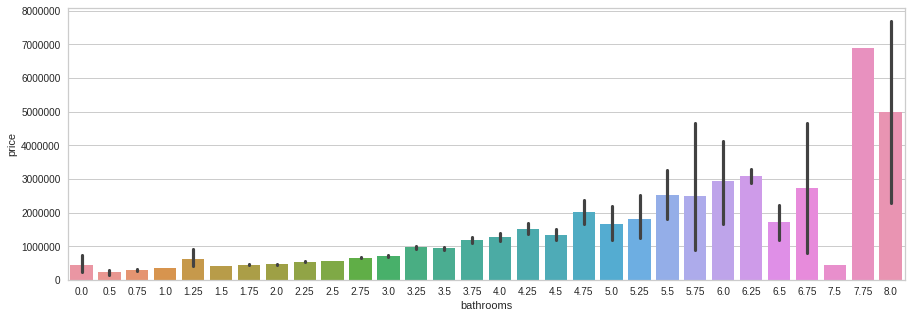

In [380]:
sns.barplot(x='bathrooms', y='price', data=data)

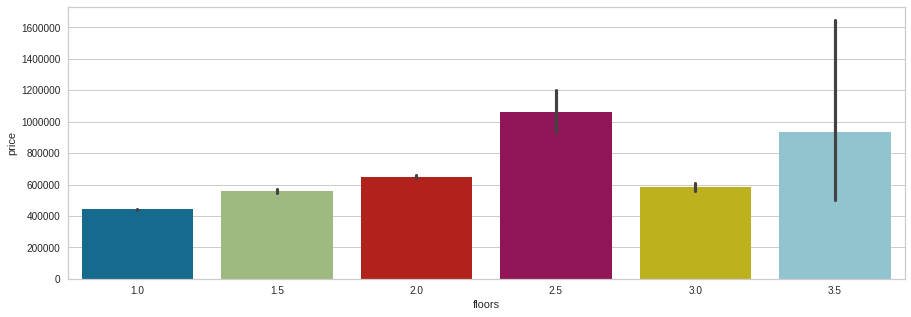

In [381]:
sns.barplot(x='floors', y='price', data=data)

2.5 floors has high impact on price

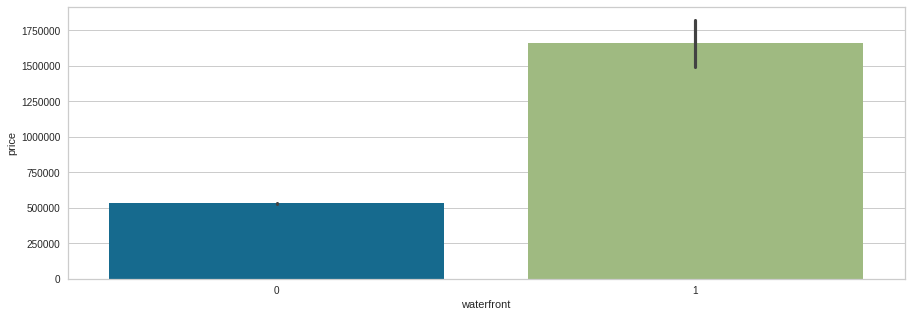

In [382]:
sns.barplot(x='waterfront', y='price', data=data)

houses with water front have high price

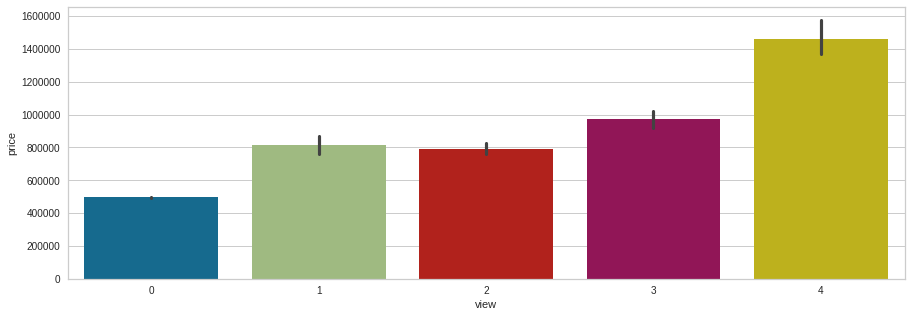

In [383]:
sns.barplot(x='view', y='price', data=data)

Houses with more view has high price

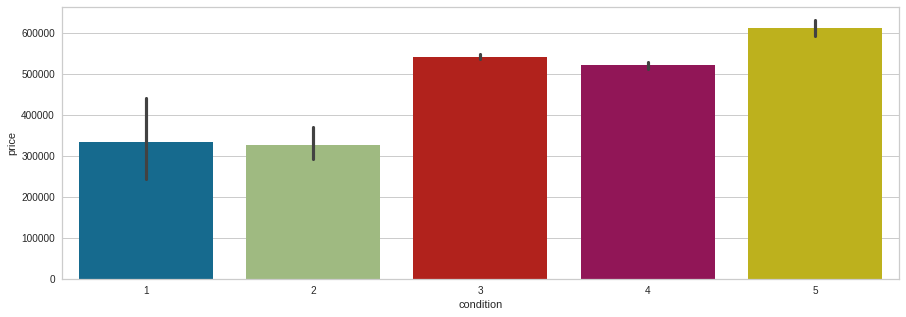

In [384]:
sns.barplot(x='condition', y='price', data=data)

houses with good condition has high price

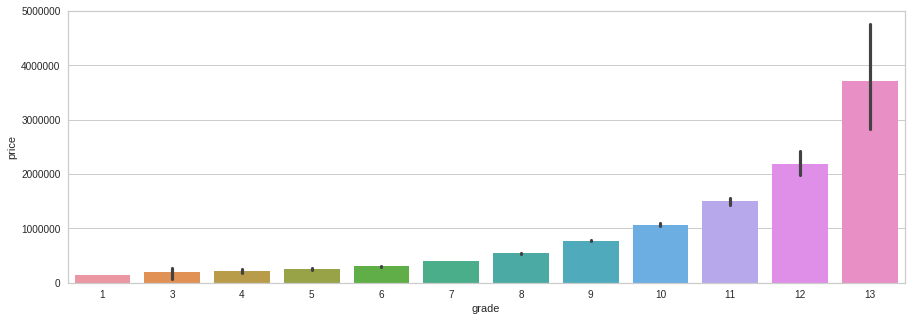

In [385]:
sns.barplot(x='grade', y='price', data=data)

High grade houses has high price

2.numerical

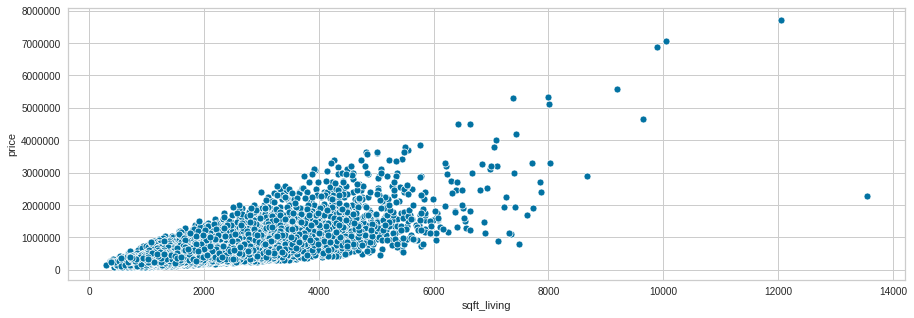

In [386]:
sns.scatterplot(x='sqft_living', y='price', data=data)

houses with more sqft has more price(good predictor)

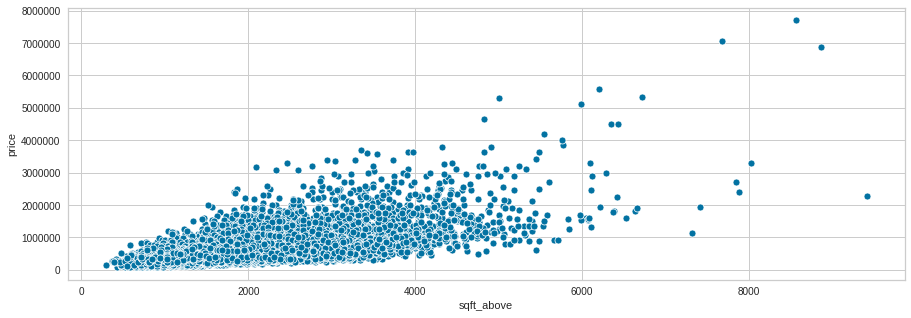

In [387]:
sns.scatterplot(x='sqft_above', y='price', data=data)

More sqft high price

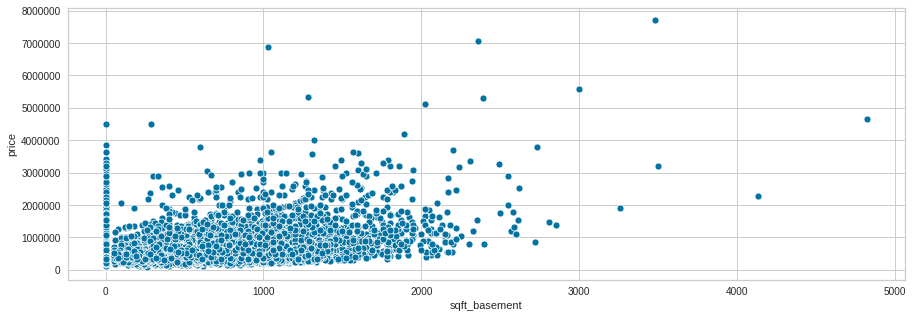

In [388]:
sns.scatterplot(x='sqft_basement', y='price', data=data)

More sqft high price

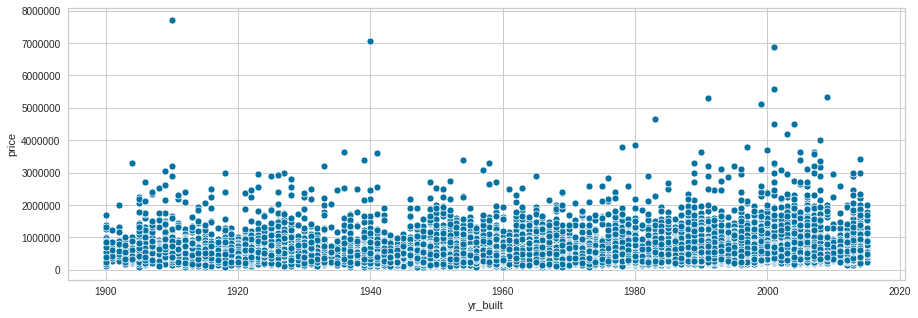

In [389]:
sns.scatterplot(x='yr_built', y='price', data=data)

price varies with yr built

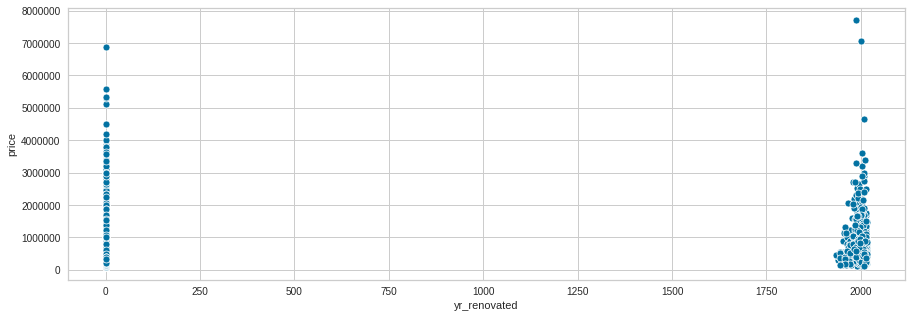

In [390]:
sns.scatterplot(x='yr_renovated', y='price', data=data)

houses renovated after 2000 has high price,Mostly not renovated

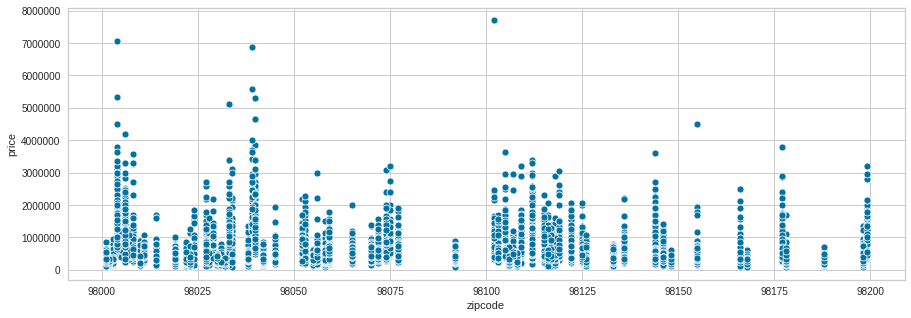

In [391]:
sns.scatterplot(x='zipcode', y='price', data=data)

Price varies with zipcode

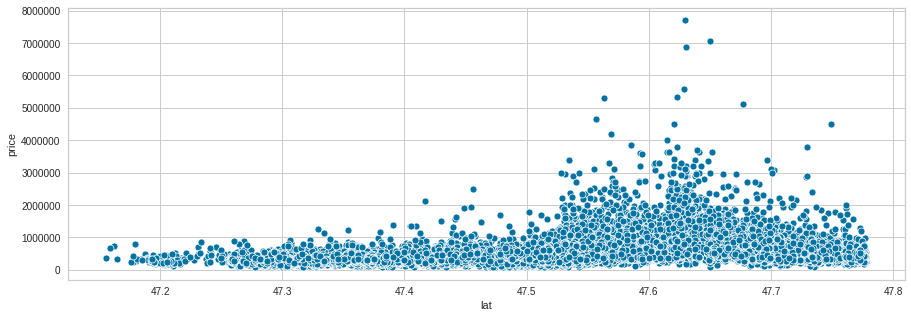

In [392]:
sns.scatterplot(x='lat', y='price', data=data)

price is high in particular area

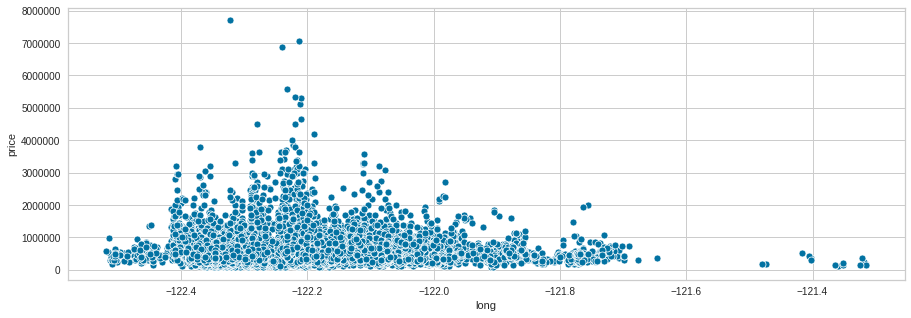

In [393]:
sns.scatterplot(x='long', y='price', data=data)

Price is high in particular long

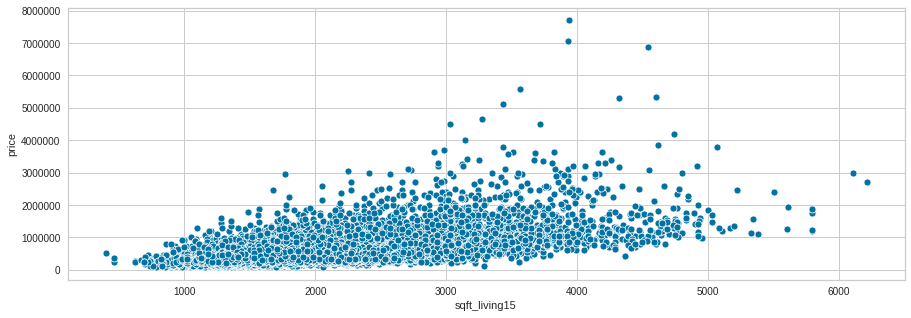

In [394]:
sns.scatterplot(x='sqft_living15', y='price', data=data)

more sqft high price

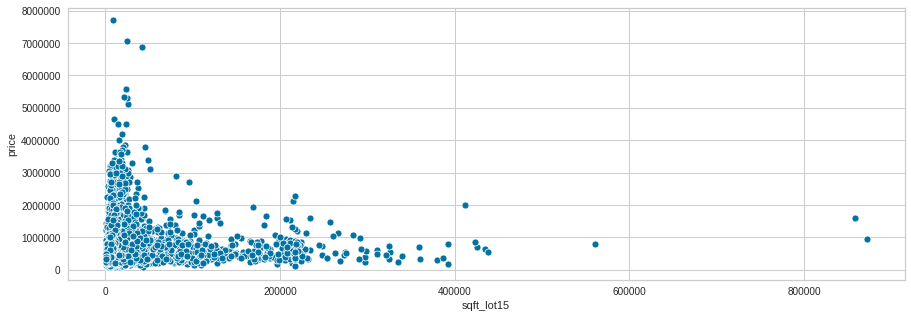

In [395]:
sns.scatterplot(x='sqft_lot15', y='price', data=data)

4.Bivariate Analysis Feature vs Feature (Selected Feature)

In [396]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

From the above analysis Id and Date to be doesnt give any relation so we drop both colums


**4.Feature Engineering**

In [397]:
data.drop('id',axis=1,inplace=True)

In [398]:
data.drop('date',axis=1,inplace=True)

In [399]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Normalization**

Now there is more skewness in the Numerical features. so we need to Normalise it

0.42807247557592526

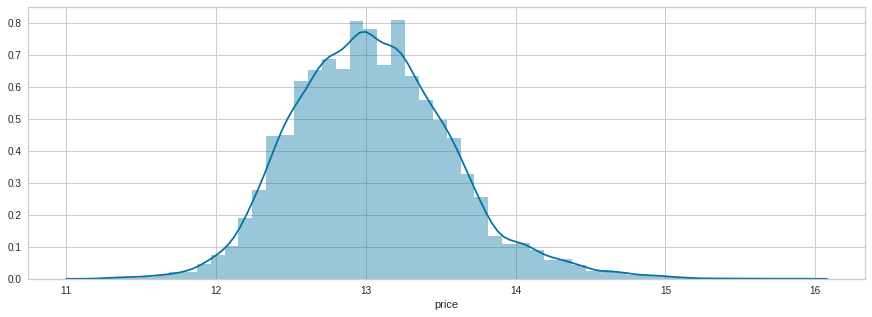

In [400]:
sns.distplot(np.log(data['price']))
np.log(data['price']).skew()

There is high positive skew in prices .so we are taking log to normalise.

In [401]:
data['price']=np.log(data['price'])

0.6177889916703141

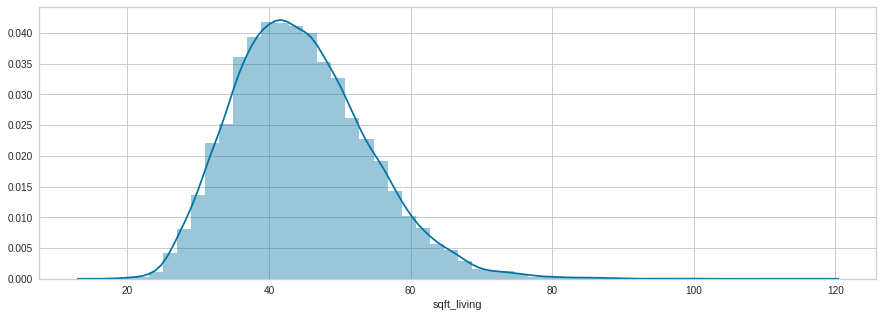

In [402]:
sns.distplot(np.sqrt(data['sqft_living']))
np.sqrt(data['sqft_living']).skew()

-0.03543769299569605

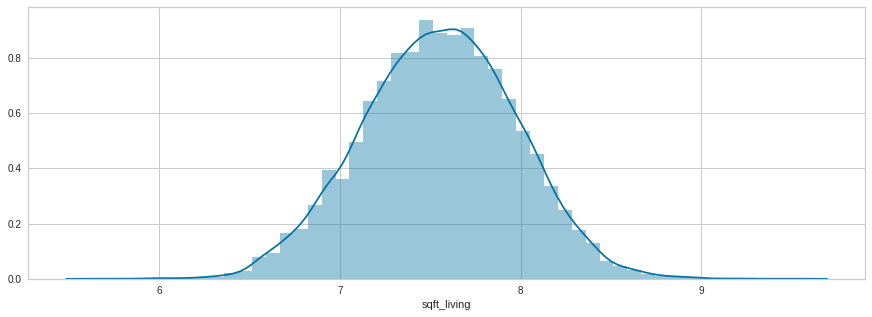

In [403]:
sns.distplot(np.log(data['sqft_living']))
np.log(data['sqft_living']).skew()

Skewness reduced by log

In [404]:
data['sqft_living']=np.log(data['sqft_living'])

4.783397352376896

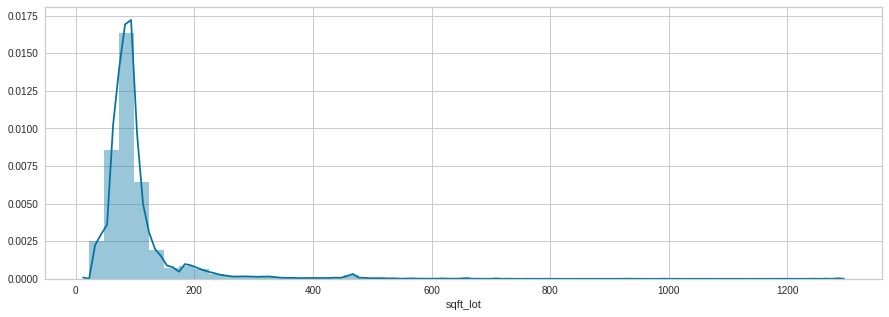

In [405]:
sns.distplot(np.sqrt(data['sqft_lot']))
np.sqrt(data['sqft_lot']).skew()

0.9621711661039318

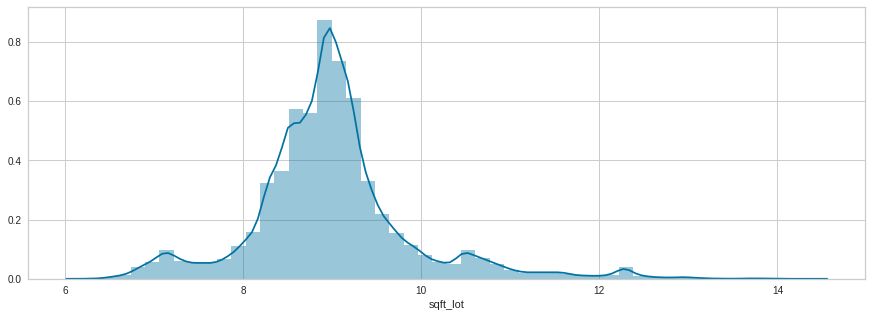

In [406]:
sns.distplot(np.log(data['sqft_lot']))
np.log(data['sqft_lot']).skew()

Skewness reduced by log

In [407]:
data['sqft_lot']=np.log(data['sqft_lot'])

0.7920902536589387

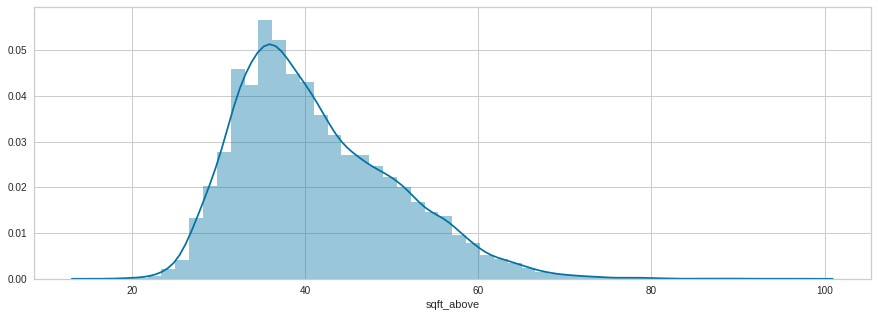

In [408]:
sns.distplot(np.sqrt(data['sqft_above']))
np.sqrt(data['sqft_above']).skew()

0.2533841263015587

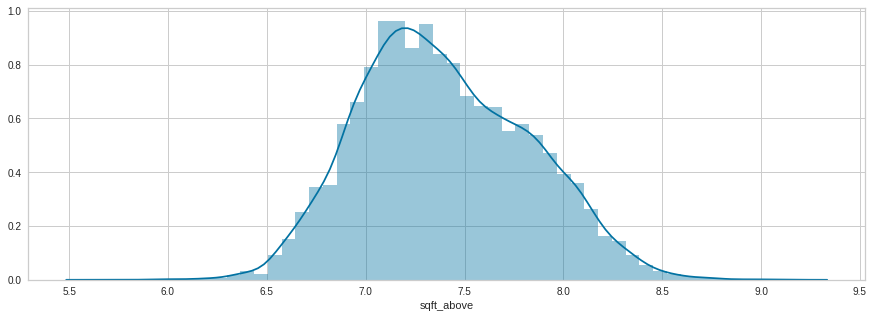

In [409]:
sns.distplot(np.log(data['sqft_above']))
np.log(data['sqft_above']).skew()

skewness reduced by log

In [410]:
data['sqft_above']=np.log(data['sqft_above'])

0.7837878028336538

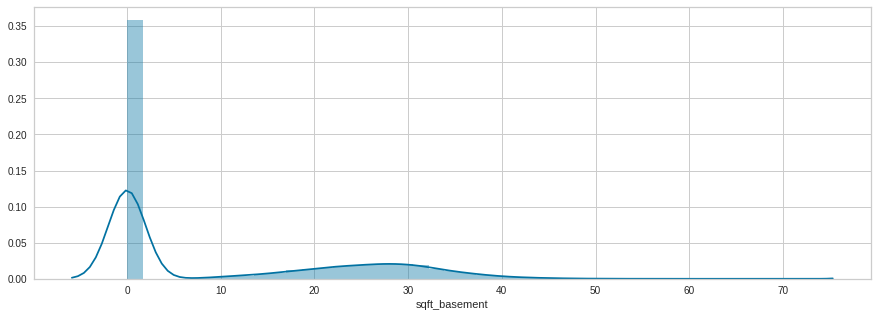

In [411]:
sns.distplot(np.sqrt(data['sqft_basement']))
np.sqrt(data['sqft_basement']).skew()

-0.48243408482781225

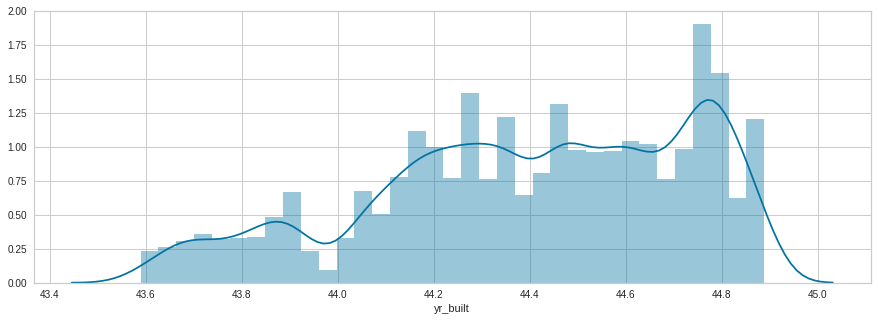

In [412]:
sns.distplot(np.sqrt(data['yr_built']))
np.sqrt(data['yr_built']).skew()

Skewness reduced by sqrt

In [413]:
data['yr_built']=np.sqrt(data['yr_built'])

-0.4876511465619959

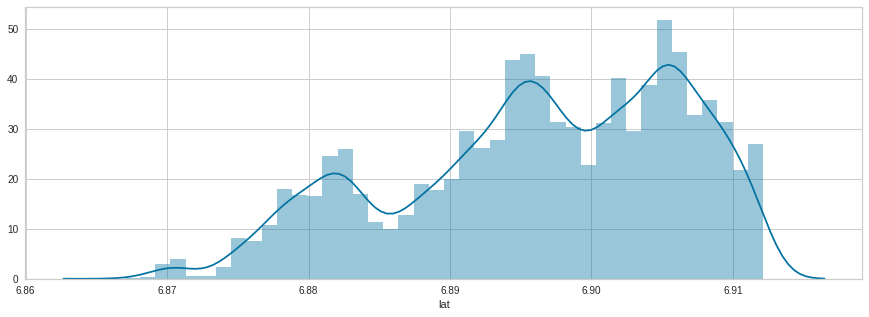

In [414]:
sns.distplot(np.sqrt(data['lat']))
np.sqrt(data['lat']).skew()

skewness reduced by sqrt

In [415]:
data['lat']=np.sqrt(data['lat'])

0.4048579829110462

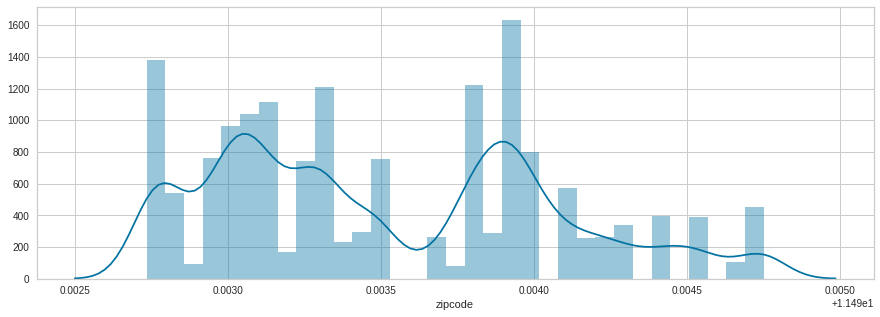

In [416]:
sns.distplot(np.log(data['zipcode']))
np.log(data['zipcode']).skew()

normalised by log

In [417]:
data['zipcode']=np.log(data['zipcode'])

0.640517255497765

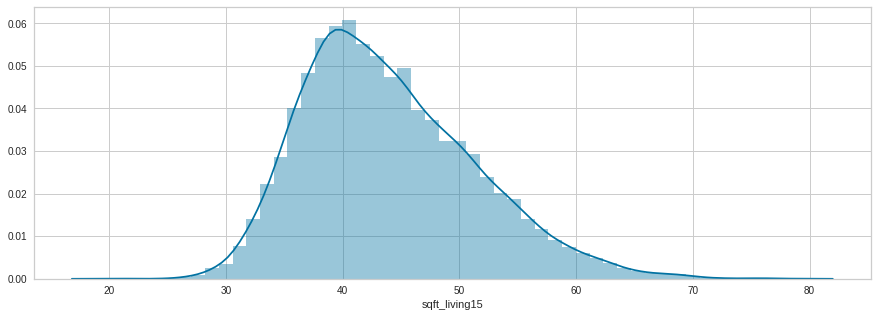

In [418]:
sns.distplot(np.sqrt(data['sqft_living15']))
np.sqrt(data['sqft_living15']).skew()

0.20649673445864591

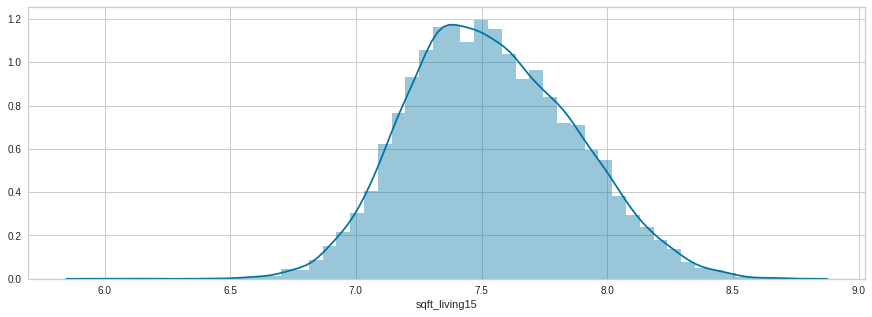

In [419]:
sns.distplot(np.log(data['sqft_living15']))
np.log(data['sqft_living15']).skew()

normalised by log

In [420]:
data['sqft_living15']=np.log(data['sqft_living15'])

0.9665677830702063

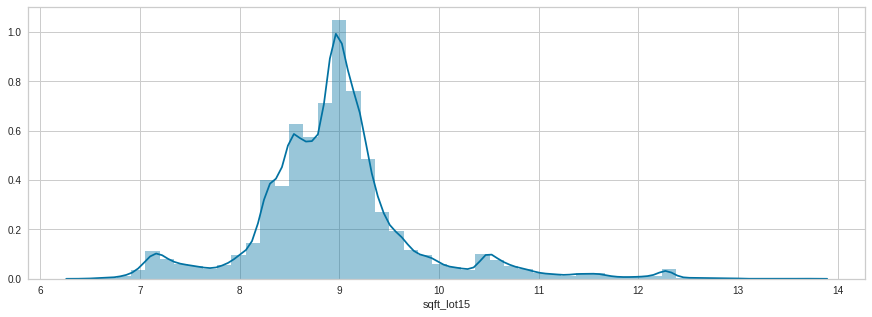

In [421]:
sns.distplot(np.log(data['sqft_lot15']))
np.log(data['sqft_lot15']).skew()

normalised by log

In [422]:
data['sqft_lot15']=np.log(data['sqft_lot15'])

Now From the Above Analysis We got clean Data and Important feature for prediction

**5.Model application**

Price is the target value, so we droping it

In [423]:
targets=data['price']
data.drop(columns=['price'],inplace=True)

Spliting Test data and train data

In [424]:
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(data,targets,test_size = 0.2)
print(x_data.shape,x_test.shape)

(17290, 18) (4323, 18)


Linear Regression

In [425]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_data, y_data)
from sklearn.metrics import mean_squared_error
data_pred = lr.predict(x_data)
mean_squared_error(y_data, data_pred)

0.06245362258466257

In [426]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.0652515197526214

Decision Tree

In [427]:
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor(max_depth=15,random_state=0)
lr.fit(x_data, y_data)
from sklearn.metrics import mean_squared_error
data_pred = lr.predict(x_data)
mean_squared_error(y_data, data_pred)

0.009037100456666614

In [428]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.055114353567899774

Random Forest

In [429]:
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(n_estimators=15,random_state=0)
lr.fit(x_data, y_data)
from sklearn.metrics import mean_squared_error
data_pred = lr.predict(x_data)
mean_squared_error(y_data, data_pred)

0.005915307952409768

In [430]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

0.03381686171012322

/opt/conda/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


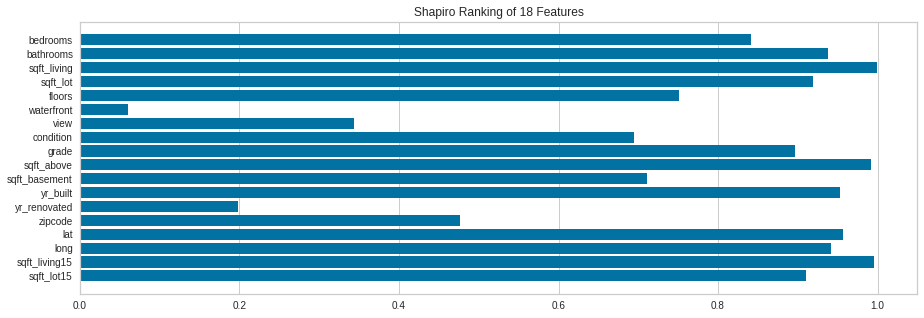

In [431]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features=x_data.columns, algorithm='shapiro')
visualizer.fit(x_data, y_data)                
visualizer.transform(x_data)             
visualizer.poof()                   

These are the Ranking given for each features

**Conclusion**: From the Above, the given data fits into the model for the King country house price predictions.Here we use mean square error for predictions and also we use three models like LinearRegression,RandomTree and RondomForest for comparison of Result.Thus Linear Regression model fits with low bias and variance.